## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Configuations

In [2]:
# path of the dataset
data_path='C:/Users/ansar/Desktop/Workspace/Personal/MLOPs/Heart Storke Prediction/api/src/notebooks/stroke-data.csv'

# disable the limit for viewing all rows
pd.set_option('display.max_rows', None)
# disable the limit for viewing all columns
pd.set_option('display.max_columns', None)

## Exploratory Data analysis

In [3]:
# loading the dataset
df = pd.read_csv(data_path)

In [4]:
# view first 5 rows in the dataset 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# viewing the shape of the dataset
df.shape

(5110, 12)

In [6]:
# viewing the number of missing values in the dataset
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# checking the percentage of missing values
missing_values = df.isna().sum()
print('Percentage of missing values:')
print(missing_values[missing_values > 0] / len(df) * 100)

Percentage of missing values:
bmi    3.933464
dtype: float64


In [8]:
 # checking for duplicate rows
print('Duplicate rows: ', df.duplicated().sum())

Duplicate rows:  0


In [9]:
# viewing the features in the dataset
print(f'Features in the dataset: {df.columns}')

Features in the dataset: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [10]:
# checking the datatypes
print(f'Datatypes in the dataset: {df.dtypes.value_counts()}')

Datatypes in the dataset: object     5
int64      4
float64    3
Name: count, dtype: int64


### Insights after initial analysis:

- There are some missing values in the bmi feature
- There are no duplicate rows
- There are object (5), int64 (4), float64 (3)
- Here only bmi, age and avg_glucose_level are true numeric features, hypertension and hear_disease are categorical features which are already encoded.

In [11]:
# dropping the id column
df.drop('id', axis=1, inplace=True)

In [20]:
# separating numeric and object features of further analysis
numeric_feats = ['bmi', 'age', 'avg_glucose_level']
object_feature = df.select_dtypes(include='object').columns

In [21]:
# viewing the summary statistics of numeric features
df[numeric_feats].describe()

,bmi,age,avg_glucose_level
count,4909.000000,5110.000000,5110.000000
mean,28.893237,43.226614,106.147677
std,7.854067,22.612647,45.283560
min,10.300000,0.080000,55.120000
25%,23.500000,25.000000,77.245000
50%,28.100000,45.000000,91.885000
75%,33.100000,61.000000,114.090000
max,97.600000,82.000000,271.740000


In [24]:
# checking the skewness of numeric features
for feature in numeric_feats:
    print(f'Skewness of {feature}: {df[feature].skew()}')

Skewness of bmi: 1.0553402052962912
Skewness of age: -0.1370593225984694
Skewness of avg_glucose_level: 1.5722838665030459


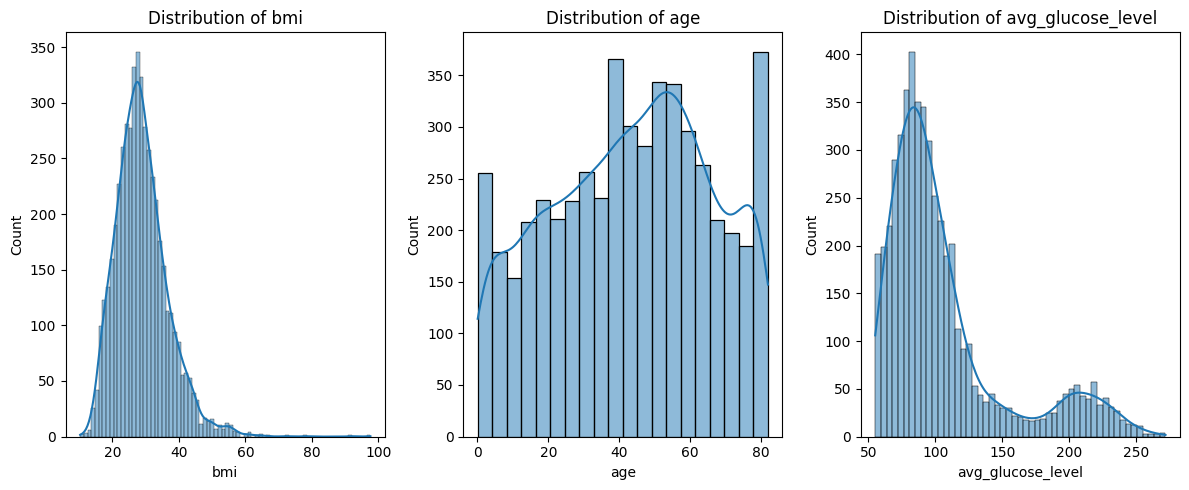

In [27]:
# viewing distribuiton of numeric features
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, feature in enumerate(numeric_feats):
    sns.histplot(df[feature], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()